# IN2020 Assignment 3 - Experiment and Humans

## Part A: Statistical analysis

Familiarizing myself with the data.

In [233]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from scipy import stats

### Data gathering

In [152]:
# Downloading with requests
url = 'https://www.uio.no/studier/emner/matnat/ifi/IN2020/h18/assignments/dataset_1.xlsx'
r = requests.get(url, allow_redirects=True)

with open('dataset_1.xlsx', 'wb') as data:
    data.write(r.content)

In [223]:
# Reading in data
df = pd.read_excel('dataset_1.xlsx')

In [224]:
# Initial assessment of the data set
df.head()

,PARTICIPANTS,Unnamed: 1,Unnamed: 2,Unnamed: 3,PROTOTYPE 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,PROTOTYPE 3,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Group,Participant,Age,Disability or illness,Arm-hand steadiness,Manual dexterity,Finger dexterity,Control precision,Multi-Limb Co-ordination,Wrist-Finger Speed,...,Finger dexterity,Control precision,Multi-Limb Co-ordination,Wrist-Finger Speed,Arm-hand steadiness,Manual dexterity,Finger dexterity,Control precision,Multi-Limb Co-ordination,Wrist-Finger Speed
1,User,Geir,85,Tremor,7,6,5,4,7,5,...,4,3,1,5,10,4,3,5,9,5
2,User,Kjell,82,Parkinson's disease,6,8,2,4,6,3,...,3,4,2,5,3,2,2,3,7,5
3,User,Truls O.,86,Muscle stifness,7,5,4,2,9,2,...,3,5,3,5,8,3,5,5,2,5
4,User,Oda,70-71,Osteoarthritis,4,4,1,2,4,1,...,8,4,5,7,5,2,4,6,5,8


### Data cleaning

In [225]:
# Preparing data set for analysis

# Fixing columns
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)

# Renaming some columns
df.columns = pd.io.parsers.ParserBase({'names':df.columns})._maybe_dedup_names(df.columns)

df.rename(index=str, columns={'Arm-hand steadiness' : 'prototype_1_arm-hand_steadiness', 
                              'Manual dexterity' : 'prototype_1_manual_dexterity', 
                              'Finger dexterity' : 'prototype_1_finger_dexterity',
                              'Control precision' : 'prototype_1_control_precision',
                              'Multi-Limb Co-ordination' : 'prototype_1_multi-limb_co-ordination',
                              'Wrist-Finger Speed' : 'prototype_1_wrist-finger_speed',
                              'Arm-hand steadiness.1' : 'prototype_2_arm-hand_steadiness', 
                              'Manual dexterity.1' : 'prototype_2_manual_dexterity', 
                              'Finger dexterity.1' : 'prototype_2_finger_dexterity',
                              'Control precision.1' : 'prototype_2_control_precision',
                              'Multi-Limb Co-ordination.1' : 'prototype_2_multi-limb_co-ordination',
                              'Wrist-Finger Speed.1' : 'prototype_2_wrist-finger_speed',
                              'Arm-hand steadiness.2' : 'prototype_3_arm-hand_steadiness', 
                              'Manual dexterity.2' : 'prototype_3_manual_dexterity', 
                              'Finger dexterity.2' : 'prototype_3_finger_dexterity',
                              'Control precision.2' : 'prototype_3_control_precision',
                              'Multi-Limb Co-ordination.2' : 'prototype_3_multi-limb_co-ordination',
                              'Wrist-Finger Speed.2' : 'prototype_3_wrist-finger_speed',
                              'Group' : 'group', 'Participant' : 'name', 'Age' : 'age', 
                              'Disability or illness' : 'disability_or_illness'},
            inplace=True)


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1 to 53
Data columns (total 22 columns):
group                                   53 non-null object
name                                    53 non-null object
age                                     53 non-null object
disability_or_illness                   53 non-null object
prototype_1_arm-hand_steadiness         52 non-null object
prototype_1_manual_dexterity            52 non-null object
prototype_1_finger_dexterity            52 non-null object
prototype_1_control_precision           52 non-null object
prototype_1_multi-limb_co-ordination    52 non-null object
prototype_1_wrist-finger_speed          52 non-null object
prototype_2_arm-hand_steadiness         53 non-null object
prototype_2_manual_dexterity            53 non-null object
prototype_2_finger_dexterity            53 non-null object
prototype_2_control_precision           53 non-null object
prototype_2_multi-limb_co-ordination    53 non-null object
prototype_2_wrist

In [227]:
df.head()

,group,name,age,disability_or_illness,prototype_1_arm-hand_steadiness,prototype_1_manual_dexterity,prototype_1_finger_dexterity,prototype_1_control_precision,prototype_1_multi-limb_co-ordination,prototype_1_wrist-finger_speed,...,prototype_2_finger_dexterity,prototype_2_control_precision,prototype_2_multi-limb_co-ordination,prototype_2_wrist-finger_speed,prototype_3_arm-hand_steadiness,prototype_3_manual_dexterity,prototype_3_finger_dexterity,prototype_3_control_precision,prototype_3_multi-limb_co-ordination,prototype_3_wrist-finger_speed
1,User,Geir,85,Tremor,7,6,5,4,7,5,...,4,3,1,5,10,4,3,5,9,5
2,User,Kjell,82,Parkinson's disease,6,8,2,4,6,3,...,3,4,2,5,3,2,2,3,7,5
3,User,Truls O.,86,Muscle stifness,7,5,4,2,9,2,...,3,5,3,5,8,3,5,5,2,5
4,User,Oda,70-71,Osteoarthritis,4,4,1,2,4,1,...,8,4,5,7,5,2,4,6,5,8
5,User,Per Tore,f. 1930,Tremor,5,8,3,5,6,3,...,7,7,3,5,9,7,6,7,7,5


### Assignment 1
Making sure the data set is free from errors and coded. Looking at the dataframe info we see that all columns are of string type, where other data types would be more appropriate.

In [228]:
# Initial visual assessment of the data set revealed several data issues. Going through these in turn.

# Setting first 40 group values equal to 'User', and remainder to 'Control'
df.loc[:40,'group'] = 'User'
df.loc[40:,'group'] = 'Control'

# Dropping duplicate row for 'Berit'
df.drop(df.index[22], inplace=True)

# Dropping Ylva due to missing values for prototype 1. Another option would have been to replace NaNs
df.drop(df.index[51], inplace=True)

# Need to fix 8 age-values
age_dict = {'70-71':'71', 'f. 1930':'88', 'Nitti':'90', 'Straks 91':'90', '88 eller 89':'89', 'f. 1939':'81', 
            '51-modell':'67', 'f. 1928':'90'}

df.replace({'age': age_dict}, inplace=True)

# Casting columns
df['group'] = df['group'].astype('category')
df['age'] = df['age'].astype('int')
df['disability_or_illness'] = df['disability_or_illness'].astype('category')

columns_to_int = list(df.columns[4:])
for col in columns_to_int:
    df[col] = df[col].astype('int')

In [379]:
# Adding columns with aggregated scores per protoype
prototype_1_cols = list(df.columns[4:10])
prototype_2_cols = list(df.columns[10:16])
prototype_3_cols = list(df.columns[16:22])

df['prototype_1_scores'] = df[prototype_1_cols].sum(axis=1) / len(prototype_1_cols)
df['prototype_2_scores'] = df[prototype_2_cols].sum(axis=1) / len(prototype_2_cols)
df['prototype_3_scores'] = df[prototype_3_cols].sum(axis=1) / len(prototype_3_cols)

In [428]:
df_users = df.loc[df['group'] == 'User']

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1 to 52
Data columns (total 25 columns):
group                                   51 non-null category
name                                    51 non-null object
age                                     51 non-null int64
disability_or_illness                   51 non-null category
prototype_1_arm-hand_steadiness         51 non-null int64
prototype_1_manual_dexterity            51 non-null int64
prototype_1_finger_dexterity            51 non-null int64
prototype_1_control_precision           51 non-null int64
prototype_1_multi-limb_co-ordination    51 non-null int64
prototype_1_wrist-finger_speed          51 non-null int64
prototype_2_arm-hand_steadiness         51 non-null int64
prototype_2_manual_dexterity            51 non-null int64
prototype_2_finger_dexterity            51 non-null int64
prototype_2_control_precision           51 non-null int64
prototype_2_multi-limb_co-ordination    51 non-null int64
prototype_2_wrist-finger_

### Assignment 2
Visualizing data.

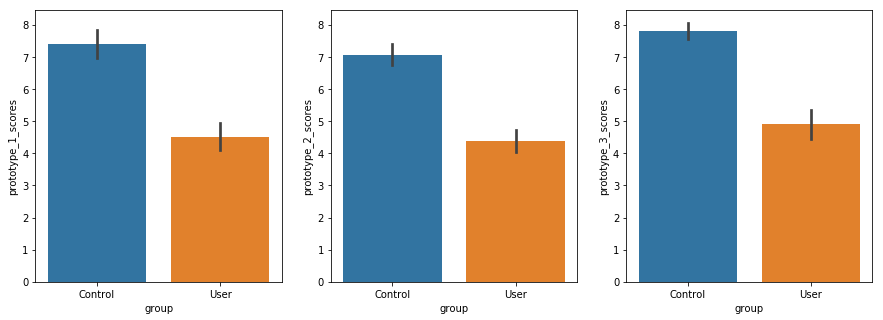

In [409]:
# Plotting scores for both groups for all three prototypes

plt.figure(1, figsize=(15, 5))
p1 = plt.subplot(131)
sns.barplot(x="group", y="prototype_1_scores", data=df)
p2 = plt.subplot(132, sharey=p1)
sns.barplot(x="group", y="prototype_2_scores", data=df)
p3 = plt.subplot(133, sharey=p1)
sns.barplot(x="group", y="prototype_3_scores", data=df)
plt.show()

We see that the control group scores are higher than the user group for all three prototypes, and that the scores are quite even across all prototypes.

In [322]:
def compare_groups(col):
    plt.figure(1, figsize=(15, 4))
    p1 = plt.subplot(121)
    sns.countplot(df_users.loc[:, col])
    p2 = plt.subplot(122, sharey=p1)
    sns.countplot(df_control.loc[:, col])
    plt.show()

In [411]:
# compare_groups('prototype_1_arm-hand_steadiness')

In [430]:
def prototype_score(prototype_cols):
    plt.figure(1, figsize=(15, 4))
    plt.subplots_adjust(hspace=0.4)
    p1 = plt.subplot(231)
    sns.countplot(df_users.loc[:, prototype_cols[0]])
    p2 = plt.subplot(232, sharey=p1)
    sns.countplot(df_users.loc[:, prototype_cols[1]])
    p3 = plt.subplot(233, sharey=p1)
    sns.countplot(df_users.loc[:, prototype_cols[2]])
    p4 = plt.subplot(234, sharey=p1)
    sns.countplot(df_users.loc[:, prototype_cols[3]])
    p5 = plt.subplot(235, sharey=p1)
    sns.countplot(df_users.loc[:, prototype_cols[4]])
    p6 = plt.subplot(236, sharey=p1)
    sns.countplot(df_users.loc[:, prototype_cols[5]])
    plt.show()

Plotting distribution of scores 
- for all six columns for each prototype
- for each column across all prototypes

to visualize outliers, differences and simialarties across prototypes. Looking at the graphs below it would seem users struggle with finger dexterity on prototype 1 and arm-hand steadiness on prototype 2. Over all, it seems that prototype 3 achieves the highest over-all scores, with an exception for manual dexterity.

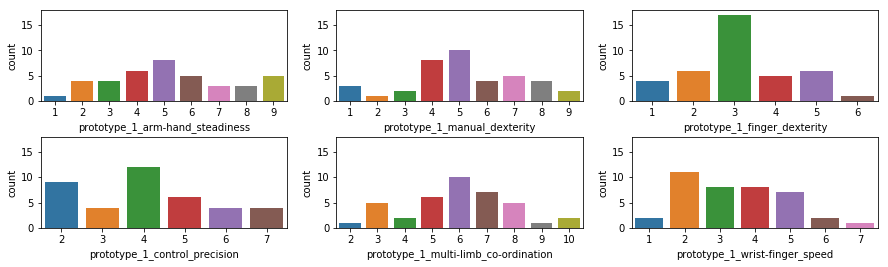

In [431]:
prototype_score(prototype_1_cols)

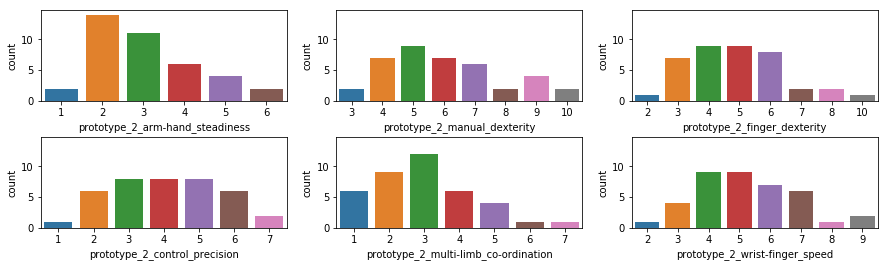

In [432]:
prototype_score(prototype_2_cols)

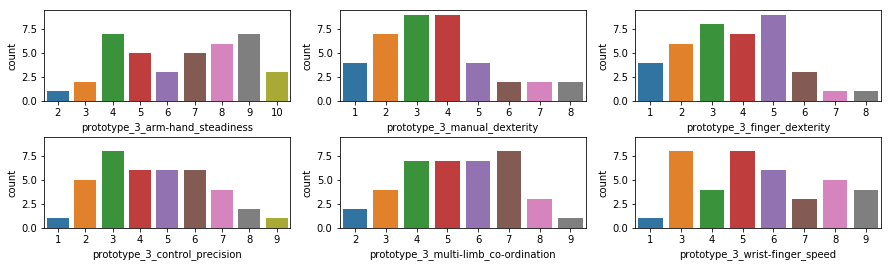

In [433]:
prototype_score(prototype_3_cols)

In [434]:
# Compare the distribution of values for columns between the two prototypes.

def compare_prototypes(col1, col2, col3):
    plt.figure(1, figsize=(15, 4))
    p1 = plt.subplot(131)
    sns.countplot(df_users.loc[:, col1])
    p2 = plt.subplot(132, sharey=p1)
    sns.countplot(df_users.loc[:, col2])
    p3 = plt.subplot(133, sharey=p1)
    sns.countplot(df_users.loc[:, col3])
    plt.show()

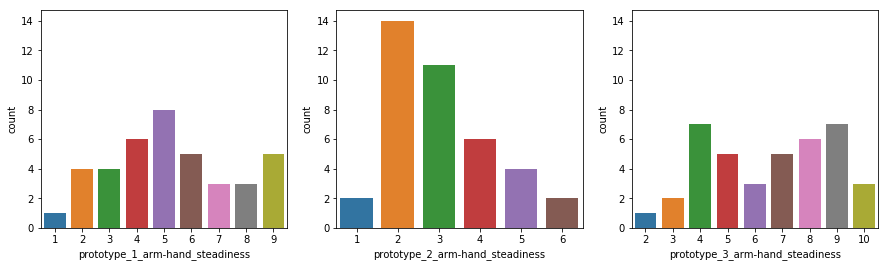

In [435]:
compare_prototypes('prototype_1_arm-hand_steadiness', 'prototype_2_arm-hand_steadiness', 
                   'prototype_3_arm-hand_steadiness')

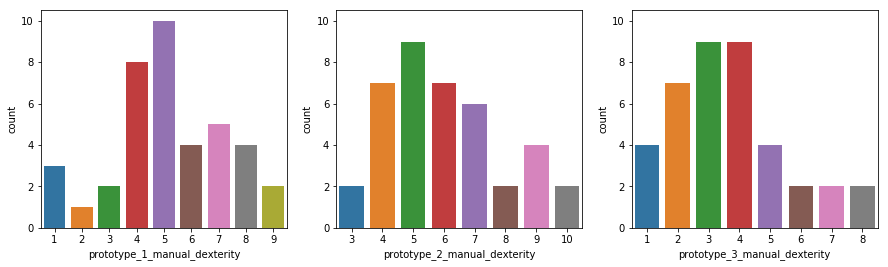

In [436]:
compare_prototypes('prototype_1_manual_dexterity', 'prototype_2_manual_dexterity', 'prototype_3_manual_dexterity')

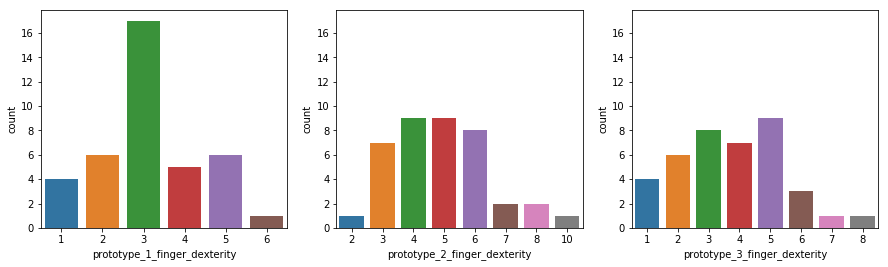

In [437]:
compare_prototypes('prototype_1_finger_dexterity', 'prototype_2_finger_dexterity', 'prototype_3_finger_dexterity')

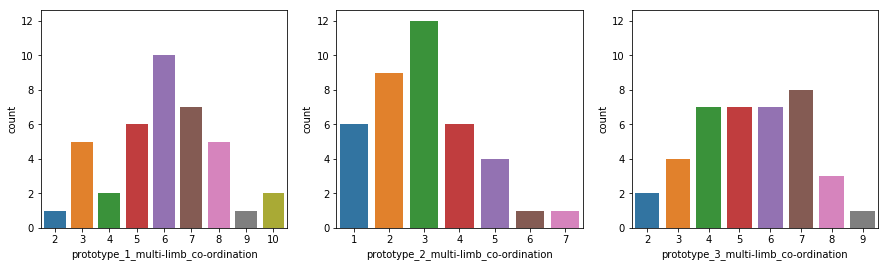

In [438]:
compare_prototypes('prototype_1_multi-limb_co-ordination', 'prototype_2_multi-limb_co-ordination', 'prototype_3_multi-limb_co-ordination')

### Assignment 3
Descriptive statistics.

In [440]:
# Summary descriptive statistics of the data set
df_users.describe()

,age,prototype_1_arm-hand_steadiness,prototype_1_manual_dexterity,prototype_1_finger_dexterity,prototype_1_control_precision,prototype_1_multi-limb_co-ordination,prototype_1_wrist-finger_speed,prototype_2_arm-hand_steadiness,prototype_2_manual_dexterity,prototype_2_finger_dexterity,...,prototype_2_wrist-finger_speed,prototype_3_arm-hand_steadiness,prototype_3_manual_dexterity,prototype_3_finger_dexterity,prototype_3_control_precision,prototype_3_multi-limb_co-ordination,prototype_3_wrist-finger_speed,prototype_1_scores,prototype_2_scores,prototype_3_scores
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,80.564103,5.256410,5.179487,3.153846,4.102564,5.974359,3.435897,3.051282,6.025641,4.923077,...,5.256410,6.538462,3.666667,3.743590,4.564103,5.384615,5.487179,4.517094,4.388889,4.897436
std,6.373444,2.267829,2.075823,1.246858,1.602545,1.939712,1.465298,1.276276,1.898575,1.660447,...,1.649848,2.269317,1.854345,1.712461,1.970772,1.756423,2.113513,1.282356,1.178718,1.399987
min,67.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.833333,2.666667
25%,77.500000,4.000000,4.000000,2.500000,3.000000,5.000000,2.000000,2.000000,5.000000,4.000000,...,4.000000,4.500000,2.000000,2.500000,3.000000,4.000000,4.000000,3.416667,3.500000,3.750000
50%,81.000000,5.000000,5.000000,3.000000,4.000000,6.000000,3.000000,3.000000,6.000000,5.000000,...,5.000000,7.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.500000,4.166667,5.000000
75%,85.000000,7.000000,7.000000,4.000000,5.000000,7.000000,4.500000,4.000000,7.000000,6.000000,...,6.000000,8.500000,4.500000,5.000000,6.000000,7.000000,7.000000,5.000000,4.750000,5.750000
max,90.000000,9.000000,9.000000,6.000000,7.000000,10.000000,7.000000,6.000000,10.000000,10.000000,...,9.000000,10.000000,8.000000,8.000000,9.000000,9.000000,9.000000,7.666667,7.000000,8.500000
